# Trabalho 3 - Mineração de Dados - Agrupamento de Dados
### Integrantes
- Alisson Hayasi da Costa, 726494
- Theodosio Banevicius, 619825

# Problema
A grande empresa multinacional UNIBRAZIL decidiu que pretende dividir a gerencia da empresa em marcas menores e mais especializadas. Assim, com novas marcas, a lojas serão especialistas em seus clientes, terão apenas os produtos que interessam a eles, aumentando as vendas e reduzindo gastos com transporte e estoque.

Entretanto, dividir uma empresa em várias marcas pode ser um processo custoso. Afinal, é necessário gerenciar a marca, publicidade e funcionários especializados.

Portanto, deve-se levantar um perfil de clientes para cada uma das marcas. Definir em quantas marcas a UNIBRAZIL deverá ser divida e porquê (A partir das amostras da base de dados da empresa em “clientes.txt”). E também, responder perguntas como:
- Qual o percentual de clientes ficará sob a bandeira de cada marca?
- Qual o perfil de compra dos clientes de cada marca?

# Resolução


O primeiro passo para a resolução do problema é verificar a base de dados, buscar possíveis ruídos e analisar os dados nela presentes a fim de extrair informações que revelem o perfil de compra dos clientes.

In [3]:
import pandas as pd

In [4]:
df = pd.read_table('clientes.txt', sep='\s+')
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,64,6,482,58,4,541,48,3,674,40
1,59,6,387,58,4,572,50,2,748,52
2,65,6,470,62,4,470,51,2,751,43
3,61,5,449,61,5,579,41,3,862,45
4,70,6,435,62,4,491,49,3,772,47
5,63,6,482,64,4,583,41,2,809,44
6,62,6,437,59,5,578,51,3,727,47
7,63,7,476,68,3,535,43,2,769,53
8,60,6,439,62,4,528,48,3,766,43
9,63,6,356,61,4,533,50,4,785,53


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
P1     1000000 non-null int64
P2     1000000 non-null int64
P3     1000000 non-null int64
P4     1000000 non-null int64
P5     1000000 non-null int64
P6     1000000 non-null int64
P7     1000000 non-null int64
P8     1000000 non-null int64
P9     1000000 non-null int64
P10    1000000 non-null int64
dtypes: int64(10)
memory usage: 76.3 MB


In [7]:
df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,58.789346,4.895837,595.683333,55.781555,4.954866,470.767628,51.049714,4.730933,638.422693,46.643571
std,17.163796,1.310315,155.315804,16.186851,1.002656,101.831011,14.705206,1.933922,166.489925,12.674079
min,7.000000,2.000000,234.000000,11.000000,2.000000,50.000000,18.000000,0.000000,184.000000,7.000000
25%,58.000000,4.000000,438.000000,40.000000,4.000000,411.000000,39.000000,3.000000,566.000000,41.000000
50%,65.000000,4.000000,619.000000,59.000000,5.000000,490.000000,48.000000,4.000000,692.000000,47.000000
75%,70.000000,6.000000,736.000000,70.000000,6.000000,545.000000,63.000000,6.000000,769.000000,53.000000
max,94.000000,8.000000,961.000000,99.000000,8.000000,780.000000,90.000000,10.000000,1000.000000,83.000000


A partir dos métodos `.info()` e `.describe()` sabemos que:
 - Não há valores faltantes. Todos os clientes listados na base de dados possui um dado de compra de todos os 10 produtos.
 - Não há dados inconsistentes. Portanto, todos os clientes listados na base de dados contém valores inteiros positivos como contagem de compra de um produto.
 
Além disso, nota-se que alguns produtos são comprados em uma quantidade imensa como P9 e P3, enquanto que outros são comprados em poucas quantidades como P2 e P5. Isso nos leva a uma pergunta interessante de ser respondida que é o total de produtos comprados.

Pois, essa informação, aliada com informações futuras, podem indicar quais os produtos mais importantes/vendidos e como eles se relacionam com os outros.

In [8]:
total_prod_comprados = df.iloc[:,:].sum()
total_prod_comprados.sort_values(ascending=False)

P9     638422693
P3     595683333
P6     470767628
P1      58789346
P4      55781555
P7      51049714
P10     46643571
P5       4954866
P2       4895837
P8       4730933
dtype: int64

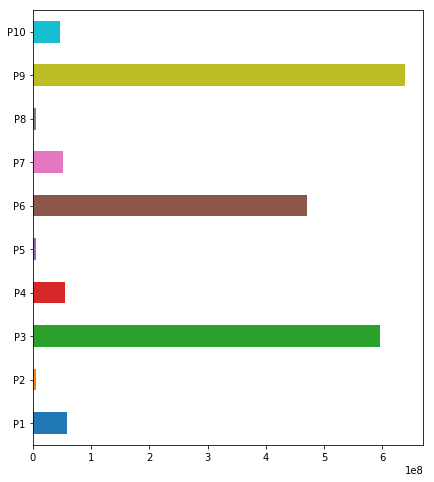

In [10]:
total_prod_comprados.plot('barh', figsize=(7,8))

A partir do gráfico e da variável `total_prod_comprados` podemos notar que os produtos P9, P3 e P6 são os mais consumidos (nessa ordem) sendo a quantidade de compra muito alta (mais de 400 milhões). Os produtos P1, P4, P7 e P10 são os seguintes na lista de mais consumidos, indo de 46 milhões (P10) a 58 milhões (P1).

Por fim, os produtos menos comprados são P5, P2 e P8 que ficam na casa dos 4 milhões.

A partir dessas informações, nota-se que existem 3 grupos de consumo principais. Isto é, existe um grupo cujo consumo é muito alto, acima de 400 milhões. Outro grupo cujo o consumo é médio, acima de 40 milhões e um grupo minoritário com consumo em 4 milhões. Ou seja, cada grupo é aproximadamente 10 vezes maior que seu antecessor indicando que uma possível partição de grupos poderia ser tal.

Além dos produtos mais comprados, é interessante descobrir quais as quantidades que cada cliente compra dos 10 produtos para assim compreender um pouco mais o perfil de compra dos clientes em si.

In [11]:
total_cli_comprados = df.sum(axis=1).sort_values(ascending=False)
total_cli_comprados

194042    2331
188601    2330
69877     2320
200864    2318
68441     2314
305263    2309
12654     2309
248241    2307
106838    2307
187461    2305
309181    2305
194289    2303
36401     2301
206023    2301
19540     2301
53028     2300
44047     2299
219639    2298
84574     2295
104126    2294
303062    2294
367606    2293
348915    2291
212031    2290
88294     2290
279418    2290
300652    2290
184677    2289
105167    2287
398017    2286
          ... 
823484    1411
960072    1411
999158    1411
913720    1410
813514    1410
859633    1409
966811    1408
832782    1407
852811    1406
863256    1405
959206    1403
879797    1401
823120    1400
933121    1399
967369    1399
900029    1397
930405    1394
971406    1394
961824    1392
888048    1389
916718    1387
864724    1384
995520    1383
854887    1383
859317    1380
992261    1379
979569    1377
986064    1298
855589    1287
862113    1217
Length: 1000000, dtype: int64

In [12]:
total_cli_comprados.describe()

count    1000000.000000
mean        1931.719476
std          118.521577
min         1217.000000
25%         1863.000000
50%         1939.000000
75%         2014.000000
max         2331.000000
dtype: float64

A partir da descrição de quantidade de compra dos clientes, nota-se uma média com desvio padrão relativamente "ok". Ou seja, não existe uma diferença extremamente discrepante entre a maior compra (no caso, 2331) e menor compra (1217), que, por se tratar de compras de produtos, poderia acontecer. 

Por não existir tal diferença, há uma certa dificuldade para identificar quais clientes possuem uma característica de compra referente a quantidade.

Contudo, tanto a quantidade de produtos mais comprados, quanto a quantidade de produtos que cada cliente comprou aliado com a correlação dos produtos, pode nos fornecer informações valiosas sobre quais produtos seriam mais indicados ficarem juntos e quais deveriam estarem separados.

In [13]:
df.corr().style.background_gradient(cmap='bwr').set_precision(2)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
P1,1,0.24,-0.22,0.28,-0.64,0.66,-0.33,-0.65,0.14,0.71
P2,0.24,1,0.08,0.69,-0.16,0.4,0.55,-0.59,-0.49,0.63
P3,-0.22,0.08,1,-0.12,0.23,-0.52,0.64,0.51,-0.69,0.059
P4,0.28,0.69,-0.12,1,0.098,0.58,0.43,-0.69,-0.52,0.69
P5,-0.64,-0.16,0.23,0.098,1,-0.36,0.39,0.41,-0.39,-0.34
P6,0.66,0.4,-0.52,0.58,-0.36,1,-0.21,-0.83,0.12,0.61
P7,-0.33,0.55,0.64,0.43,0.39,-0.21,1,0.078,-0.88,0.25
P8,-0.65,-0.59,0.51,-0.69,0.41,-0.83,0.078,1,-0.03,-0.69
P9,0.14,-0.49,-0.69,-0.52,-0.39,0.12,-0.88,-0.03,1,-0.42
P10,0.71,0.63,0.059,0.69,-0.34,0.61,0.25,-0.69,-0.42,1


- A maior correlação entre produtos está com P1-P10 com 0.71. Tal correlação indica que P1 e P10 crescem juntos. Interpretando isso como produtos, pode-se inferir que quando P1 ou P10 é comprado então seu par também tende a ser comprado. Isso indica que P1 e P10 poderiam ser produtos gerenciados pela mesma empresa.

- Além de P1-P10, também há uma boa correlação entre P2 e P4 com 0.69, indicando o mesmo funcionamento de P1 e P10. Porém, além disso, tanto P4 quanto P2 também possuem uma correlação interessante com P10 e, como P1 não possui uma correlação negativa (inversa) nem com P2 e nem com P4 então, pode ser inferindo um encadeamento de produtos. Isto é, P1, P2, P4 e P10 poderiam ser gerenciados pela mesma divisão da empresa.

- P1 e P6 também possuem uma boa correlação e, assim como ocorre com P1 quanto à P2 e P4, P6 não tem uma correlação inversa com qualquer um dos produtos P2, P4 ou P10. Na verdade, a correlação entre tais produtos é até certo ponto interessante.

- Portanto, um possível grupo de produtos a ser formado seria um composto por P1, P2, P4, P6 e P10.

- Outra correlação interessante entre produtos ocorre com P3 e P7 com 0.64 de correlação. Porém, apesar de P7 possui uma boa correlação com alguns dos demais produtos citados anteriormente (P1, P2, P4, P6 e P10) o mesmo não ocorre com P3, indicando que um possível grupo seria P3 e P7.

- Produtos com uma correlação inversa também podem denúnciar produtos que tendem a não ser consumidos em conjunto e, assim, formar grupos através dessa informação.

- Isto é, o produto P8 possui uma correlação negativa para todos os membros do Grupo 1 (P1, P2, P4, P6 e P10) indicando que eles variam inversamente. Portanto, é interessante que P8 fique separado destes.

- Quanto P5, o mesmo não possui uma correlação tão interessante com qualquer um dos outros produtos. As melhores correlações está com P7 e P8, contudo, não são valores interessantes. Em contra partida, há uma correlação inversa com P1 interessante, indicando que P5 não seria vantajoso de se estar com P1.

- Já P9 possui um comportamento interessante quando comparado aos outros produtos. Isto porque o mesmo é o produto mais vendido da empresa. Porém, sua correlação com todos os demais produtos é negativa indicando que quando P9 é comprado os outros produtos não são comprados na mesma proporção. Isso relata o fato de que P9 poderia compor um grupo sozinho.

- Enfim, a partir dessa análise das correlações, é possível inferir que a divisão da empresa em 3 ou 4 marcas é algo possivelmente vantajoso. Por exemplo, poderia haver uma empresa responsável pelos produtos P1, P2, P4, P6 e P10, outra empresa responsável pelos produtos P3 e P7, uma empresa responsável por P5 e P8 e, por fim, uma empresa responsável pelo produto P9.

- Caso essa divisão fosse feita e fosse contabilizado quanto cada empresa venderia baseado nos produtos que a mesma gerencia:
	- Empresa 1 (P1, P2, P4, P6 e P10): Teria vendido um total de 636 877 937
	- Empresa 2 (P3 e P7): Teria vendido um total de 646 733 047
	- Empresa 3 (P5 e P8): Teria vendido um total de 9 685 799
	- Empresa 4 (P9): Teria vendido um total 638 422 693

Outra análise interessante que pode ser feita, é verificar como os clientes que compram acima ou abaixo da média em um produto se comportam na compra de outros produtos.

Podemos fazer essa verificação para o P1, por exemplo

In [14]:
mean = df.mean()
s = df.loc[df.iloc[:,0] < mean[0]]
s.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
count,256231.000000,256231.000000,256231.000000,256231.000000,256231.00000,256231.000000,256231.000000,256231.000000,256231.000000,256231.000000
mean,32.935090,4.300686,648.021543,46.591611,5.87827,363.195218,56.784265,6.778149,620.671297,31.807373
std,13.080213,0.891750,120.159393,10.056287,0.95058,111.128167,7.829498,2.099275,72.571663,10.042180
min,7.000000,2.000000,245.000000,18.000000,2.00000,50.000000,22.000000,0.000000,200.000000,7.000000
25%,24.000000,4.000000,610.000000,40.000000,6.00000,286.000000,53.000000,7.000000,574.000000,25.000000
50%,28.000000,4.000000,685.000000,44.000000,6.00000,334.000000,58.000000,8.000000,603.000000,29.000000
75%,35.000000,4.000000,730.000000,50.000000,6.00000,413.000000,62.000000,8.000000,648.000000,35.000000
max,58.000000,8.000000,961.000000,91.000000,8.00000,780.000000,87.000000,10.000000,948.000000,81.000000


In [16]:
s.corr().style.background_gradient(cmap='bwr').set_precision(2)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
P1,1,0.75,-0.84,0.8,-0.73,0.8,-0.73,-0.92,0.75,0.81
P2,0.75,1,-0.67,0.56,-0.74,0.58,-0.56,-0.78,0.67,0.66
P3,-0.84,-0.67,1,-0.79,0.67,-0.7,0.65,0.86,-0.71,-0.81
P4,0.8,0.56,-0.79,1,-0.58,0.75,-0.66,-0.79,0.57,0.78
P5,-0.73,-0.74,0.67,-0.58,1,-0.63,0.53,0.77,-0.69,-0.66
P6,0.8,0.58,-0.7,0.75,-0.63,1,-0.65,-0.83,0.66,0.75
P7,-0.73,-0.56,0.65,-0.66,0.53,-0.65,1,0.71,-0.71,-0.66
P8,-0.92,-0.78,0.86,-0.79,0.77,-0.83,0.71,1,-0.77,-0.85
P9,0.75,0.67,-0.71,0.57,-0.69,0.66,-0.71,-0.77,1,0.64
P10,0.81,0.66,-0.81,0.78,-0.66,0.75,-0.66,-0.85,0.64,1


A matriz de correlação para aqueles

In [ ]:
s = df.loc[df.iloc[:,1] < mean[1]]
s.describe()

In [ ]:
s.corr().style.background_gradient(cmap='bwr').set_precision(2)

In [ ]:
s = df.loc[df.iloc[:,2] < mean[2]]
s.describe()

In [ ]:
s.corr().style.background_gradient(cmap='bwr').set_precision(2)

In [ ]:
s = df.loc[df.iloc[:,3] < mean[3]]
s.describe()

In [ ]:
s.corr().style.background_gradient(cmap='bwr').set_precision(2)

In [ ]:
s = df.loc[df.iloc[:,4] < mean[4]]
s.describe()

In [ ]:
s.corr().style.background_gradient(cmap='bwr').set_precision(2)

In [ ]:
s = df.loc[  (df.iloc[:,0] < mean[0])
           & (df.iloc[:,1] < mean[1]) 
           & (df.iloc[:,2] < mean[2]) 
           & (df.iloc[:,3] < mean[3]) 
           & (df.iloc[:,4] < mean[4])]
s.describe()

In [ ]:
s.corr().style.background_gradient(cmap='bwr').set_precision(2)

In [ ]:
s = df.loc[df.iloc[:,0] > mean[0]]
s.describe()

In [ ]:
s.corr().style.background_gradient(cmap='bwr').set_precision(2)

In [ ]:
df.corr().style.background_gradient(cmap='bwr').set_precision(2)

In [ ]:
s = df.loc[df.iloc[:,0] > mean[0]]
s.corr().style.background_gradient(cmap='bwr').set_precision(2)

In [ ]:
s = df.loc[df.iloc[:,4] > mean[4]]
s.corr().style.background_gradient(cmap='bwr').set_precision(2)

In [ ]:
s = df.loc[  (df.iloc[:,0] > mean[0])
           & (df.iloc[:,1] > mean[1]) 
           & (df.iloc[:,2] > mean[2]) 
           & (df.iloc[:,3] > mean[3]) 
           & (df.iloc[:,4] > mean[4])]
s.describe()

In [ ]:
s.corr().style.background_gradient(cmap='bwr').set_precision(2)

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
X = df.sample(n=15000, random_state=0)

In [ ]:
kMeans_score = []

for i in range(2, 8):
    kMeans = KMeans(n_clusters=i, random_state=0).fit(X)
    labels = kMeans.labels_
    kMeans_score.append((i,
                         kMeans.inertia_, 
                         labels, 
                         silhouette_score(X, labels, metric='euclidean')))

In [ ]:
kMeans_score

In [ ]:
aggCls_score = []

for i in range(2, 8):
    aggCls = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = aggCls.labels_
    aggCls_score.append((i,
                         labels, 
                         silhouette_score(X, labels, metric='euclidean')))

In [ ]:
aggCls_score

#### Tabela

| Método        	| k=2   	| k=3   	| k=4   	| k=5   	| k=6   	| k=7   	|
|---------------	|-------	|-------	|-------	|-------	|-------	|-------	|
| kMeans        	| 0.556 	| 0.551 	| 0.605 	| 0.484 	| 0.423 	| 0.364 	|
| Agglomerative 	| 0.526 	| 0.550 	| 0.605 	| 0.471 	| 0.405 	| 0.375 	|

In [ ]:
plt.figure(figsize=(14,15))
plt.subplot(331)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=aggCls_score[2][1])
plt.subplot(332)
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=aggCls_score[2][1])
plt.subplot(333)
plt.scatter(X.iloc[:, 0], X.iloc[:, 3], c=aggCls_score[2][1])
plt.subplot(334)
plt.scatter(X.iloc[:, 0], X.iloc[:, 4], c=aggCls_score[2][1])
plt.subplot(335)
plt.scatter(X.iloc[:, 0], X.iloc[:, 5], c=aggCls_score[2][1])
plt.subplot(336)
plt.scatter(X.iloc[:, 0], X.iloc[:, 6], c=aggCls_score[2][1])
plt.subplot(337)
plt.scatter(X.iloc[:, 0], X.iloc[:, 7], c=aggCls_score[2][1])
plt.subplot(338)
plt.scatter(X.iloc[:, 0], X.iloc[:, 8], c=aggCls_score[2][1])
plt.subplot(339)
plt.scatter(X.iloc[:, 0], X.iloc[:, 9], c=aggCls_score[2][1])

In [ ]:
plt.figure(figsize=(14,15))
plt.subplot(331)
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=aggCls_score[2][1])
plt.subplot(332)
plt.scatter(X.iloc[:, 1], X.iloc[:, 3], c=aggCls_score[2][1])
plt.subplot(333)
plt.scatter(X.iloc[:, 1], X.iloc[:, 4], c=aggCls_score[2][1])
plt.subplot(334)
plt.scatter(X.iloc[:, 1], X.iloc[:, 5], c=aggCls_score[2][1])
plt.subplot(335)
plt.scatter(X.iloc[:, 1], X.iloc[:, 6], c=aggCls_score[2][1])
plt.subplot(336)
plt.scatter(X.iloc[:, 1], X.iloc[:, 7], c=aggCls_score[2][1])
plt.subplot(337)
plt.scatter(X.iloc[:, 1], X.iloc[:, 8], c=aggCls_score[2][1])
plt.subplot(338)
plt.scatter(X.iloc[:, 1], X.iloc[:, 9], c=aggCls_score[2][1])

In [ ]:
plt.figure(figsize=(14,15))
plt.subplot(331)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=aggCls_score[2][1])
plt.subplot(332)
plt.scatter(X.iloc[:, 2], X.iloc[:, 4], c=aggCls_score[2][1])
plt.subplot(333)
plt.scatter(X.iloc[:, 2], X.iloc[:, 5], c=aggCls_score[2][1])
plt.subplot(334)
plt.scatter(X.iloc[:, 2], X.iloc[:, 6], c=aggCls_score[2][1])
plt.subplot(335)
plt.scatter(X.iloc[:, 2], X.iloc[:, 7], c=aggCls_score[2][1])
plt.subplot(336)
plt.scatter(X.iloc[:, 2], X.iloc[:, 8], c=aggCls_score[2][1])
plt.subplot(337)
plt.scatter(X.iloc[:, 2], X.iloc[:, 9], c=aggCls_score[2][1])

In [ ]:
plt.figure(figsize=(14,15))
plt.subplot(331)
plt.scatter(X.iloc[:, 3], X.iloc[:, 4], c=aggCls_score[2][1])
plt.subplot(332)
plt.scatter(X.iloc[:, 3], X.iloc[:, 5], c=aggCls_score[2][1])
plt.subplot(333)
plt.scatter(X.iloc[:, 3], X.iloc[:, 6], c=aggCls_score[2][1])
plt.subplot(334)
plt.scatter(X.iloc[:, 3], X.iloc[:, 7], c=aggCls_score[2][1])
plt.subplot(335)
plt.scatter(X.iloc[:, 3], X.iloc[:, 8], c=aggCls_score[2][1])
plt.subplot(336)
plt.scatter(X.iloc[:, 3], X.iloc[:, 9], c=aggCls_score[2][1])

In [ ]:
plt.figure(figsize=(14,15))
plt.subplot(331)
plt.scatter(X.iloc[:, 4], X.iloc[:, 5], c=aggCls_score[2][1])
plt.subplot(332)
plt.scatter(X.iloc[:, 4], X.iloc[:, 6], c=aggCls_score[2][1])
plt.subplot(333)
plt.scatter(X.iloc[:, 4], X.iloc[:, 7], c=aggCls_score[2][1])
plt.subplot(334)
plt.scatter(X.iloc[:, 4], X.iloc[:, 8], c=aggCls_score[2][1])
plt.subplot(335)
plt.scatter(X.iloc[:, 4], X.iloc[:, 9], c=aggCls_score[2][1])

In [ ]:
plt.figure(figsize=(10,11))
plt.subplot(221)
plt.scatter(X.iloc[:, 5], X.iloc[:, 6], c=aggCls_score[2][1])
plt.subplot(222)
plt.scatter(X.iloc[:, 5], X.iloc[:, 7], c=aggCls_score[2][1])
plt.subplot(223)
plt.scatter(X.iloc[:, 5], X.iloc[:, 8], c=aggCls_score[2][1])
plt.subplot(224)
plt.scatter(X.iloc[:, 5], X.iloc[:, 9], c=aggCls_score[2][1])

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.scatter(X.iloc[:, 6], X.iloc[:, 7], c=aggCls_score[2][1])
plt.subplot(132)
plt.scatter(X.iloc[:, 6], X.iloc[:, 8], c=aggCls_score[2][1])
plt.subplot(133)
plt.scatter(X.iloc[:, 6], X.iloc[:, 9], c=aggCls_score[2][1])

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(X.iloc[:, 7], X.iloc[:, 8], c=aggCls_score[2][1])
plt.subplot(122)
plt.scatter(X.iloc[:, 7], X.iloc[:, 9], c=aggCls_score[2][1])

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X.iloc[:, 8], X.iloc[:, 9], c=aggCls_score[2][1])

In [ ]:
for i in range(0, 4):
    print('{:d} membros no Grupo {:d}'.format(list(kMeans_score[2][2]).count(i), i))